In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import xgboost   # 导入xgboost库
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#from feature_selector import FeatureSelector
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier  #导入sklearn分类API
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

In [3]:
X=pd.read_csv("Subseq29.csv",header=None)
y=pd.read_csv("label.csv",header=None)

In [4]:
data=pd.concat((X,y),axis=1)
data=np.array(data)
print(data.shape)
np.random.seed(612)
np.random.shuffle(data) 
data_X=data[:,0:-1]
data_y=data[:,-1]

(173, 17)


In [5]:
transfer=StandardScaler()
Standard_X=transfer.fit_transform(data_X)  #在该数据集中StandardScaler比MinMaxScaler用的好，数据整体精确度提高
Standard_Y=data_y
print(Standard_X.var())

1.0


In [6]:
cv=LeaveOneOut()

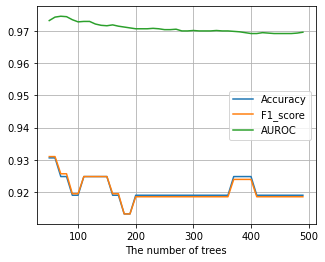

In [7]:
accuracy_a=[]
f1_a=[]
auroc_a=[]
for i in np.array(range(50,500,10)):
    Predict_Y=[]    #存放预测值
    Prob_Y=[]       #存放预测概率
    Really_Y=Standard_Y
    for train_index,test_index in cv.split(Standard_X):
        estimator=XGBClassifier(n_estimators=i)
        estimator.fit(Standard_X[train_index],Standard_Y[train_index])
        Predict_Y.append(estimator.predict(Standard_X[test_index])[0])
        Prob_Y.append(estimator.predict_proba(Standard_X[test_index]))
    Prob_Y=np.array(Prob_Y)  #将Prob_Y改为numpy数组形式
    Prob_Y=Prob_Y.reshape(173,2)  #原本是(173,1,2)形状，改为（173,2）形状
    import pandas as pd
    Prob_Y=pd.DataFrame(Prob_Y)
    Prob_Y.columns=["0","1"]
    confusion_matrix(Really_Y,Predict_Y)
    ACC=accuracy_score(Really_Y,Predict_Y)
    F1_score=f1_score(Really_Y,Predict_Y)
    AUC=roc_auc_score(Really_Y,np.array(Prob_Y["1"]))
    accuracy_a.append(ACC)
    f1_a.append(F1_score)
    auroc_a.append(AUC)
plt.figure(figsize=(5,4))
plt.plot(np.array(range(50,500,10)),accuracy_a,label="Accuracy")
plt.plot(np.array(range(50,500,10)),f1_a,label="F1_score")
plt.plot(np.array(range(50,500,10)),auroc_a,label="AUROC")
plt.xlabel("The number of trees")
plt.legend()
plt.grid()
plt.show()

In [8]:
accuracy_b=[]
f1_b=[]
auroc_b=[]
for i in np.array(range(10,52,2))/100:
    Predict_Y=[]    #存放预测值
    Prob_Y=[]       #存放预测概率
    Really_Y=Standard_Y
    for train_index,test_index in cv.split(Standard_X):
        estimator=XGBClassifier(n_estimators=50,learning_rate=i)
        estimator.fit(Standard_X[train_index],Standard_Y[train_index])
        Predict_Y.append(estimator.predict(Standard_X[test_index])[0])
        Prob_Y.append(estimator.predict_proba(Standard_X[test_index]))
    Prob_Y=np.array(Prob_Y)  #将Prob_Y改为numpy数组形式
    Prob_Y=Prob_Y.reshape(173,2)  #原本是(173,1,2)形状，改为（173,2）形状
    import pandas as pd
    Prob_Y=pd.DataFrame(Prob_Y)
    Prob_Y.columns=["0","1"]
    confusion_matrix(Really_Y,Predict_Y)
    ACC=accuracy_score(Really_Y,Predict_Y)
    F1_score=f1_score(Really_Y,Predict_Y)
    AUC=roc_auc_score(Really_Y,np.array(Prob_Y["1"]))
    accuracy_b.append(ACC)
    f1_b.append(F1_score)
    auroc_b.append(AUC)

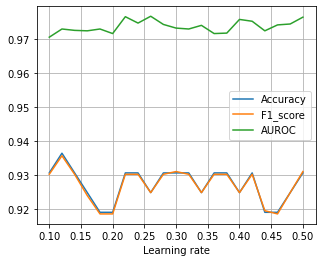

In [9]:
plt.figure(figsize=(5,4))
plt.plot(np.array(range(10,52,2))/100,accuracy_b,label="Accuracy")
plt.plot(np.array(range(10,52,2))/100,f1_b,label="F1_score")
plt.plot(np.array(range(10,52,2))/100,auroc_b,label="AUROC")
plt.xlabel("Learning rate")
plt.legend()
plt.grid()
plt.show()

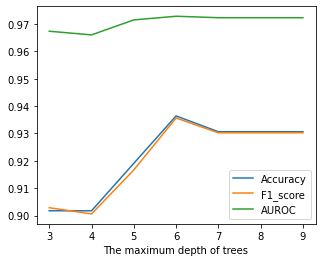

In [10]:
accuracy_c=[]
f1_c=[]
auroc_c=[]
for i in np.array(range(3,10,1)):
    Predict_Y=[]    #存放预测值
    Prob_Y=[]       #存放预测概率
    Really_Y=Standard_Y
    for train_index,test_index in cv.split(Standard_X):
        estimator=XGBClassifier(n_estimators=50,learning_rate=0.12,max_depth=i)
        estimator.fit(Standard_X[train_index],Standard_Y[train_index])
        Predict_Y.append(estimator.predict(Standard_X[test_index])[0])
        Prob_Y.append(estimator.predict_proba(Standard_X[test_index]))
    Prob_Y=np.array(Prob_Y)  #将Prob_Y改为numpy数组形式
    Prob_Y=Prob_Y.reshape(173,2)  #原本是(173,1,2)形状，改为（173,2）形状
    import pandas as pd
    Prob_Y=pd.DataFrame(Prob_Y)
    Prob_Y.columns=["0","1"]
    confusion_matrix(Really_Y,Predict_Y)
    ACC=accuracy_score(Really_Y,Predict_Y)
    F1_score=f1_score(Really_Y,Predict_Y)
    AUC=roc_auc_score(Really_Y,np.array(Prob_Y["1"]))
    accuracy_c.append(ACC)
    f1_c.append(F1_score)
    auroc_c.append(AUC)

plt.figure(figsize=(5,4))
plt.plot(np.array(range(3,10,1)),accuracy_c,label="Accuracy")
plt.plot(np.array(range(3,10,1)),f1_c,label="F1_score")
plt.plot(np.array(range(3,10,1)),auroc_c,label="AUROC")
plt.xlabel("The maximum depth of trees")
plt.legend()

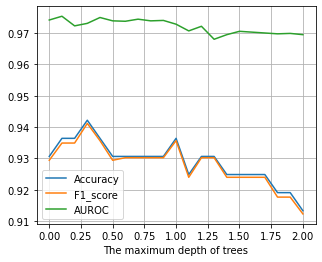

In [11]:
accuracy_d=[]
f1_d=[]
auroc_d=[]
for i in np.array(range(0,21,1))/10:
    Predict_Y=[]    #存放预测值
    Prob_Y=[]       #存放预测概率
    Really_Y=Standard_Y
    for train_index,test_index in cv.split(Standard_X):
        estimator=XGBClassifier(n_estimators=50,learning_rate=0.12,max_depth=6,reg_lambda=i)
        estimator.fit(Standard_X[train_index],Standard_Y[train_index])
        Predict_Y.append(estimator.predict(Standard_X[test_index])[0])
        Prob_Y.append(estimator.predict_proba(Standard_X[test_index]))
    Prob_Y=np.array(Prob_Y)  #将Prob_Y改为numpy数组形式
    Prob_Y=Prob_Y.reshape(173,2)  #原本是(173,1,2)形状，改为（173,2）形状
    import pandas as pd
    Prob_Y=pd.DataFrame(Prob_Y)
    Prob_Y.columns=["0","1"]
    confusion_matrix(Really_Y,Predict_Y)
    ACC=accuracy_score(Really_Y,Predict_Y)
    F1_score=f1_score(Really_Y,Predict_Y)
    AUC=roc_auc_score(Really_Y,np.array(Prob_Y["1"]))
    accuracy_d.append(ACC)
    f1_d.append(F1_score)
    auroc_d.append(AUC)

plt.figure(figsize=(5,4))
plt.plot(np.array(range(0,21,1))/10,accuracy_d,label="Accuracy")
plt.plot(np.array(range(0,21,1))/10,f1_d,label="F1_score")
plt.plot(np.array(range(0,21,1))/10,auroc_d,label="AUROC")
plt.xlabel("The maximum depth of trees")
plt.legend()
plt.grid()
plt.show()

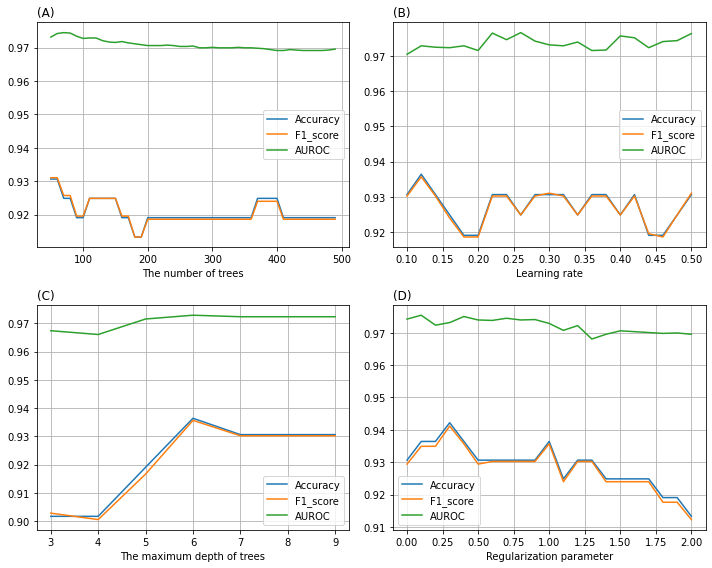

In [13]:
plt.figure(figsize=(10,8))

plt.subplot(221)
plt.plot(np.array(range(50,500,10)),accuracy_a,label="Accuracy")
plt.plot(np.array(range(50,500,10)),f1_a,label="F1_score")
plt.plot(np.array(range(50,500,10)),auroc_a,label="AUROC")
plt.xlabel("The number of trees")
plt.title('(A)',loc='left')  
plt.legend()
plt.grid()
#plt.show()
plt.subplot(222)
plt.plot(np.array(range(10,52,2))/100,accuracy_b,label="Accuracy")
plt.plot(np.array(range(10,52,2))/100,f1_b,label="F1_score")
plt.plot(np.array(range(10,52,2))/100,auroc_b,label="AUROC")
plt.xlabel("Learning rate")
plt.title('(B)',loc='left')
plt.legend(loc="center right")
plt.grid()

plt.subplot(223)
plt.plot(np.array(range(3,10,1)),accuracy_c,label="Accuracy")
plt.plot(np.array(range(3,10,1)),f1_c,label="F1_score")
plt.plot(np.array(range(3,10,1)),auroc_c,label="AUROC")
plt.xlabel("The maximum depth of trees")
plt.legend()
plt.title('(C)',loc='left')
plt.grid()

plt.subplot(224)
plt.plot(np.array(range(0,21,1))/10,accuracy_d,label="Accuracy")
plt.plot(np.array(range(0,21,1))/10,f1_d,label="F1_score")
plt.plot(np.array(range(0,21,1))/10,auroc_d,label="AUROC")
plt.xlabel("Regularization parameter")
plt.legend()
plt.grid()
plt.title('(D)',loc='left')
plt.tight_layout()

#plt.show()

plt.savefig("./Subsequence.tif",dpi=300)
plt.savefig("./Subsequence.svg",dpi=300)
plt.savefig("./Subsequence.png",dpi=300)

In [18]:
Predict_Y=[]    #存放预测值
Prob_Y=[]       #存放预测概率
Really_Y=Standard_Y
for train_index,test_index in cv.split(Standard_X):
    estimator=XGBClassifier(n_estimators=50,learning_rate=0.12,max_depth=6,reg_lambda=0.22)
    estimator.fit(Standard_X[train_index],Standard_Y[train_index])
    Predict_Y.append(estimator.predict(Standard_X[test_index])[0])
    Prob_Y.append(estimator.predict_proba(Standard_X[test_index]))
Prob_Y=np.array(Prob_Y)  #将Prob_Y改为numpy数组形式
Prob_Y=Prob_Y.reshape(173,2)  #原本是(173,1,2)形状，改为（173,2）形状
import pandas as pd
Prob_Y=pd.DataFrame(Prob_Y)
Prob_Y.columns=["0","1"]
confusion_matrix(Really_Y,Predict_Y)
ACC=accuracy_score(Really_Y,Predict_Y)
F1_score=f1_score(Really_Y,Predict_Y)
AUC=roc_auc_score(Really_Y,np.array(Prob_Y["1"]))
print(ACC)
print(F1_score)
print(AUC)

0.930635838150289
0.9294117647058824
0.9744652406417113


In [20]:
import joblib

In [21]:
estimator=XGBClassifier(n_estimators=50,learning_rate=0.12,max_depth=6,reg_lambda=0.22)
estimator.fit(Standard_X,Standard_Y)
acc_val=cross_val_score(estimator,Standard_X,Standard_Y,scoring="accuracy",cv=cv)
print("the mean score of cross validation:{:.3f}".format(np.mean(acc_val)))
#保存模型
joblib.dump(estimator,"XgBoost+Subsequence.pkl")

the mean score of cross validation:0.931


['XgBoost+Subsequence.pkl']